In [ ]:
# Cell 1: imports & settings
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

# Optional: make behavior repeatable while testing
random.seed(42)


In [ ]:
# Cell 1: imports & settings
%matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

# Optional: make behavior repeatable while testing
random.seed(42)


In [3]:
# Cell 3: Environment that holds road, car, and traffic light state
class TrafficEnvironment:
    def __init__(self, road_length=10, car_start=0):
        """
        road_length: length of road (destination at road_length)
        car_start: starting position of car
        """
        self.road_length = road_length
        self.car_position = float(car_start)
        self.light_position = road_length - 2  # place traffic light near end
        # simple cyclic light sequence: green -> yellow -> red
        self.light_sequence = ["Green", "Yellow", "Red"]
        self.light_index = 0

    def get_light(self):
        return self.light_sequence[self.light_index]

    def update_light(self):
        # Advance light to next color in cycle
        self.light_index = (self.light_index + 1) % len(self.light_sequence)

    def update_car(self, action):
        """
        Update the car position given an action:
         - "Go" -> +1.0
         - "SlowDown" -> +0.3
         - "Stop" -> +0.0
        Position is clamped to road_length.
        """
        if action == "Go":
            self.car_position += 1.0
        elif action == "SlowDown":
            self.car_position += 0.3
        elif action == "Stop":
            self.car_position += 0.0

        # clamp to road length
        if self.car_position > self.road_length:
            self.car_position = float(self.road_length)


In [4]:
# Cell 4: visualization helper
def draw_scene(env, step, action, light):
    """
    Draws a simple scene:
      - horizontal road line
      - car as a square
      - traffic light as a colored circle
    """
    clear_output(wait=True)
    plt.figure(figsize=(10,2.5))

    # road
    plt.hlines(0.5, 0, env.road_length, colors='gray', linewidth=8)

    # car (square)
    plt.plot(env.car_position, 0.5, 's', color='blue', markersize=18)

    # traffic light at fixed position
    color_map = {"Red":"red", "Yellow":"yellow", "Green":"green"}
    plt.plot(env.light_position, 0.5, 'o', color=color_map.get(light, 'black'), markersize=28)

    # annotations
    plt.text(0.2, 0.95, f"Step: {step}", fontsize=10)
    plt.text(2.2, 0.95, f"Light: {light}", fontsize=10)
    plt.text(4.2, 0.95, f"Action: {action}", fontsize=10)
    plt.text(6.2, 0.95, f"Position: {env.car_position:.1f}/{env.road_length}", fontsize=10)

    plt.xlim(-0.5, env.road_length + 0.5)
    plt.ylim(0,1.2)
    plt.axis('off')
    plt.show()


In [5]:
# Cell 5: basic simulation loop
def run_traffic_simulation(steps=15, delay=0.8):
    """
    Run a simple traffic simulation:
      - steps: number of time steps to simulate
      - delay: pause (seconds) between frames for animation
    """
    agent = GoalBasedCarAgent()                      # basic goal-based agent
    env = TrafficEnvironment(road_length=10, car_start=0)

    for step in range(1, steps+1):
        light = env.get_light()                      # current traffic light color
        action = agent.decide(light)                 # decide action based on goal & light
        env.update_car(action)                       # move car according to action

        draw_scene(env, step, action, light)         # visualize current state
        time.sleep(delay)

        env.update_light()                           # change light for next step

        # stop early if destination reached
        if env.car_position >= env.road_length:
            print("Car reached destination.")
            break

    print("Simulation finished.")


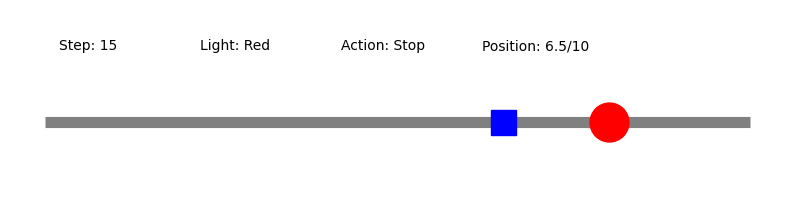

Simulation finished.


In [ ]:
# After you run Cell 1-5, execute this line in a new cell to start:
run_traffic_simulation()
